In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# --- Load the Data ---

In [2]:
df = pd.read_csv("./Data/cleanedChurn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7028,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7029,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7030,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Set a style for the plots
sns.set_style("whitegrid")

# ==============================================================================
## Churn Rate Analysis by Categorical Features
# ==============================================================================

In [4]:
print("\n--- Churn Rate Analysis by Key Features ---")

# Define categorical features to analyze
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'PaperlessBilling', 
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Electronic check', 'InternetService_Fiber optic'
]

for feature in categorical_features:
    print(f"\n--- Churn Rate by {feature} ---")
    churn_rate_by_feature = df.groupby(feature)['Churn'].mean() * 100
    print(churn_rate_by_feature)


--- Churn Rate Analysis by Key Features ---

--- Churn Rate by gender ---
gender
0    26.959518
1    26.204565
Name: Churn, dtype: float64

--- Churn Rate by SeniorCitizen ---
SeniorCitizen
0    23.650255
1    41.681261
Name: Churn, dtype: float64

--- Churn Rate by Partner ---
Partner
0    32.976092
1    19.717065
Name: Churn, dtype: float64

--- Churn Rate by Dependents ---
Dependents
0    31.279140
1    15.531205
Name: Churn, dtype: float64

--- Churn Rate by PhoneService ---
PhoneService
0    25.000000
1    26.747481
Name: Churn, dtype: float64

--- Churn Rate by PaperlessBilling ---
PaperlessBilling
0    16.375698
1    33.589251
Name: Churn, dtype: float64

--- Churn Rate by Contract_One year ---
Contract_One year
0    30.629496
1    11.277174
Name: Churn, dtype: float64

--- Churn Rate by Contract_Two year ---
Contract_Two year
0    34.056480
1     2.848665
Name: Churn, dtype: float64

--- Churn Rate by PaymentMethod_Electronic check ---
PaymentMethod_Electronic check
0    17.09

# ==============================================================================
## Analysis of Numerical Features
# ==============================================================================


--- Descriptive Analysis of Numerical Features by Churn Status ---

--- tenure by Churn Status ---
            mean  median  min  max
Churn                             
0      37.650010    38.0    1   72
1      17.979133    10.0    1   72

--- MonthlyCharges by Churn Status ---
            mean  median    min     max
Churn                                  
0      61.307408   64.45  18.25  118.75
1      74.441332   79.65  18.85  118.35

--- TotalCharges by Churn Status ---
              mean   median    min      max
Churn                                      
0      2555.344141  1683.60  18.80  8672.45
1      1531.796094   703.55  18.85  8684.80


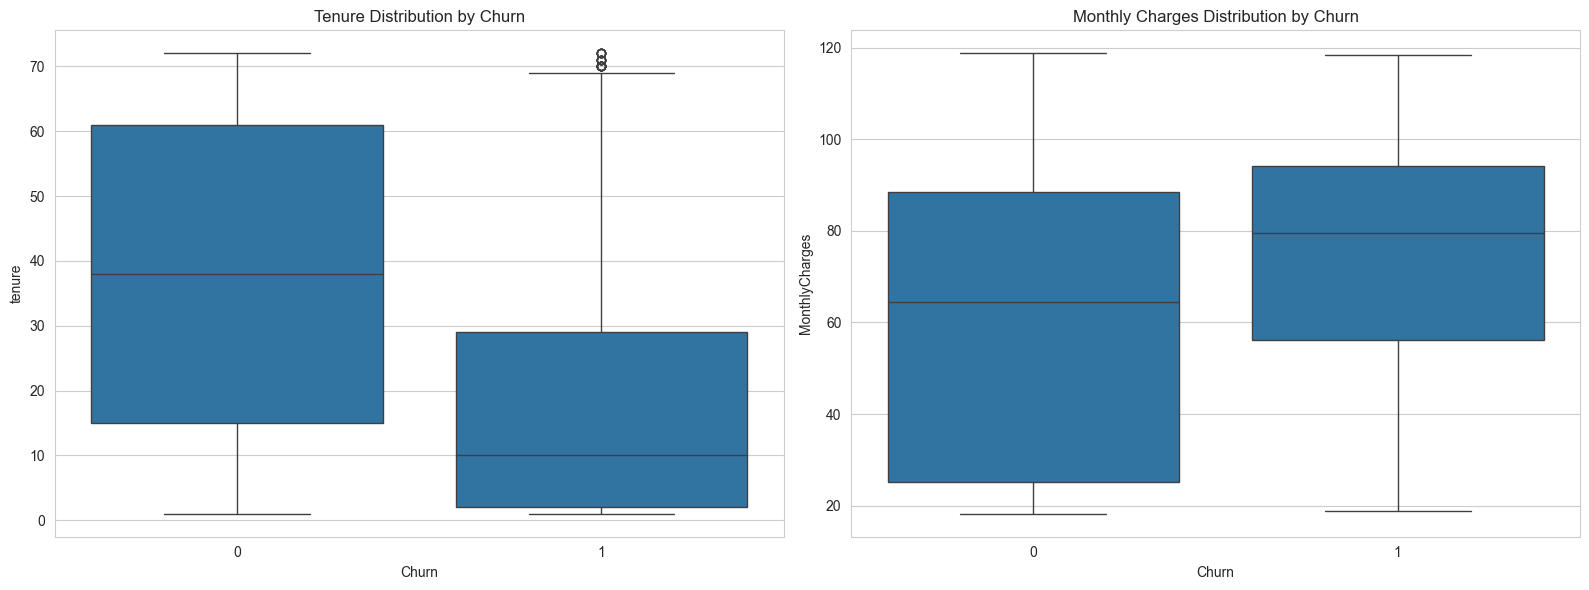

In [5]:
print("\n--- Descriptive Analysis of Numerical Features by Churn Status ---")

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    print(f"\n--- {feature} by Churn Status ---")
    avg_by_churn = df.groupby('Churn')[feature].agg(['mean', 'median', 'min', 'max'])
    print(avg_by_churn)

# Visualize numerical features against churn
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')

plt.tight_layout()
plt.show()

# ==============================================================================
## Predictive Modeling for Feature Importance
# ==============================================================================


--- Identifying Top Churn Predictors using Logistic Regression ---

--- Top 10 Most Important Features for Churn Prediction ---
                    feature  importance
8              TotalCharges    1.096762
4479  customerID_6323-AYBRX    0.984565
416   customerID_0607-DAAHE    0.983669
2377  customerID_3400-ESFUW    0.983006
2455  customerID_3512-IZIKN    0.982479
6091  customerID_8631-NBHFZ    0.974551
716   customerID_1043-YCUTE    0.972565
5227  customerID_7359-SSBJK    0.967804
1521  customerID_2225-ZRGSG    0.959118
5158  customerID_7253-UVNDW    0.958862


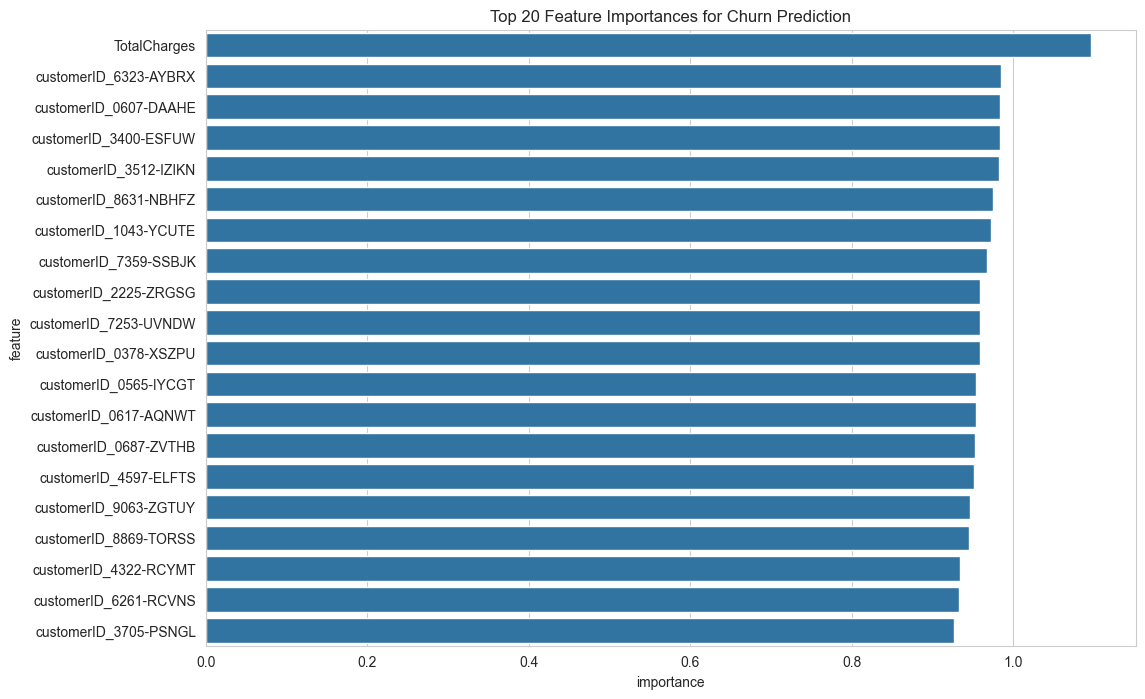

In [6]:
print("\n--- Identifying Top Churn Predictors using Logistic Regression ---")

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features for the model
scaler = MinMaxScaler()
numerical_cols_model = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_cols_model] = scaler.fit_transform(X[numerical_cols_model])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.coef_[0]
}).sort_values('importance', ascending=False)

print("\n--- Top 10 Most Important Features for Churn Prediction ---")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances for Churn Prediction')
plt.show()